# Task 1: Exploratory Data Analysis and Data Preprocessing

This notebook performs EDA and preprocessing on the CFPB complaint dataset. The steps include loading the data, analyzing complaint distributions, cleaning the narratives, and saving the processed data.

### 1. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

plt.style.use('ggplot')

### 2. Load Data

In [4]:
df = pd.read_csv('../data/raw/complaints.csv')

C:\Users\Cyber Defense\AppData\Local\Temp\ipykernel_7340\4144223494.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/complaints.csv')


### 3. Analyze Complaint Distribution

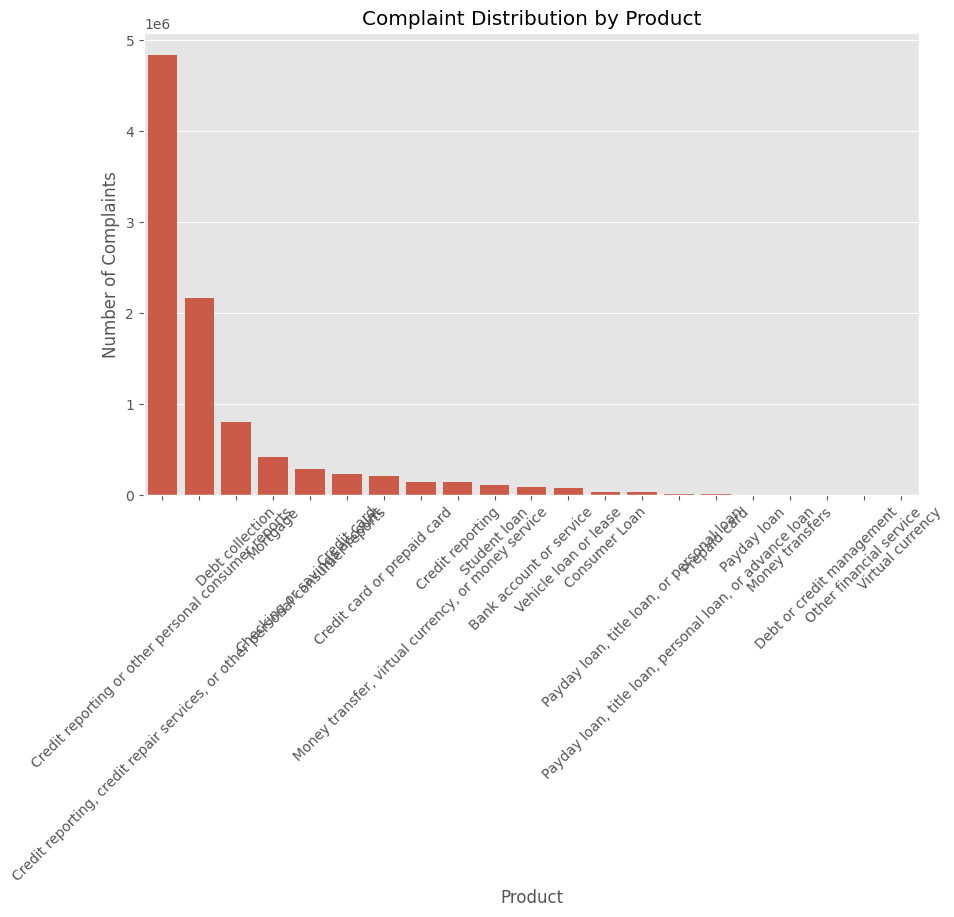

In [5]:
product_counts = df['Product'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=product_counts.index, y=product_counts.values)
plt.title('Complaint Distribution by Product')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()

### 4. Analyze Complaint Narratives

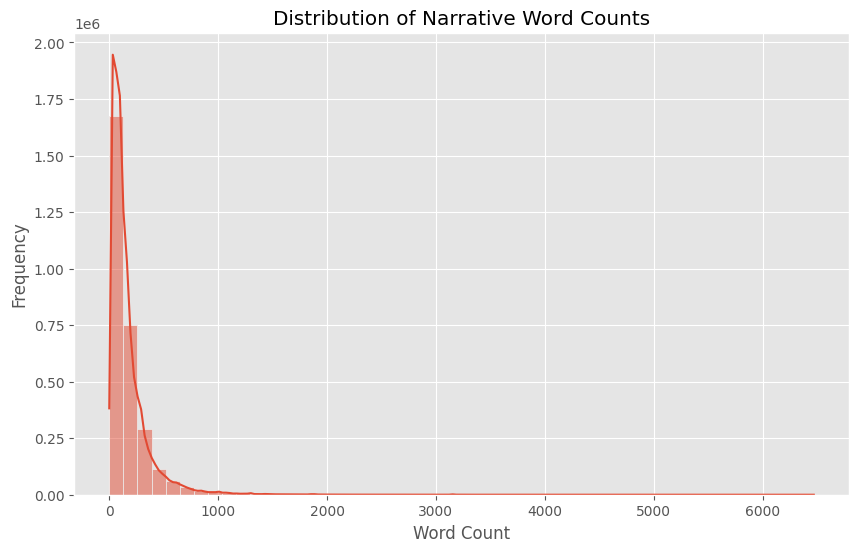

In [6]:
df['narrative_word_count'] = df['Consumer complaint narrative'].str.split().str.len()
plt.figure(figsize=(10, 6))
sns.histplot(df['narrative_word_count'].dropna(), bins=50, kde=True)
plt.title('Distribution of Narrative Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [7]:
complaints_with_narratives = df['Consumer complaint narrative'].notna().sum()
complaints_without_narratives = df['Consumer complaint narrative'].isna().sum()
print(f'Complaints with narratives: {complaints_with_narratives}')
print(f'Complaints without narratives: {complaints_without_narratives}')

Complaints with narratives: 2980756
Complaints without narratives: 6629041


### 5. Filter and Clean Data

In [8]:
products_to_include = ['Credit card', 'Personal loan', 'Buy now, pay later', 'Savings account', 'Money transfer, virtual currency, or money service']
filtered_df = df[df['Product'].isin(products_to_include) & df['Consumer complaint narrative'].notna()]

In [9]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = text.replace('i am writing to file a complaint', '')
    return text.strip()

filtered_df.loc[:, 'cleaned_narrative'] = filtered_df['Consumer complaint narrative'].apply(clean_text)

C:\Users\Cyber Defense\AppData\Local\Temp\ipykernel_7340\729892150.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'cleaned_narrative'] = filtered_df['Consumer complaint narrative'].apply(clean_text)


Show Before/After Filtering Counts and Product Distribution

Records before filtering: 9609797
Records after filtering: 177855


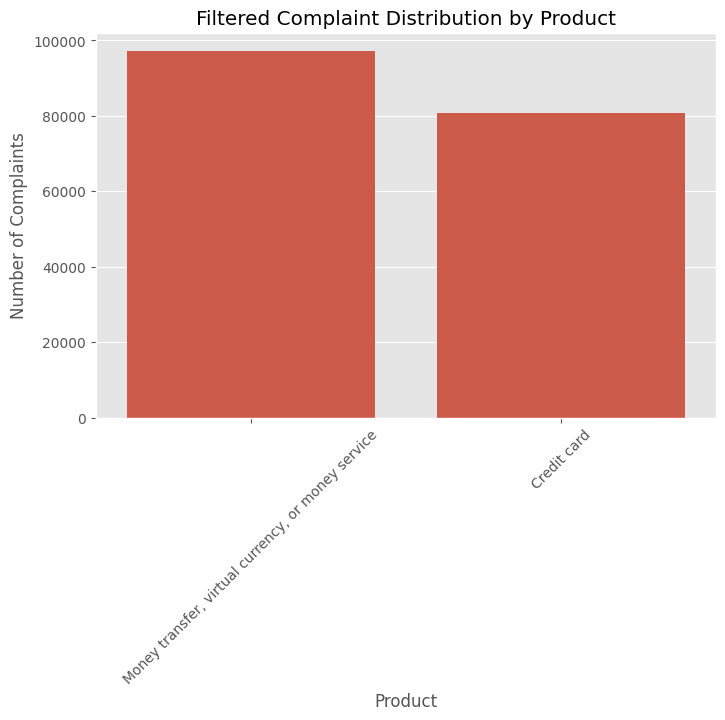

In [10]:
num_records_before = len(df)
num_records_after = len(filtered_df)
print(f"Records before filtering: {num_records_before}")
print(f"Records after filtering: {num_records_after}")

product_counts_filtered = filtered_df['Product'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=product_counts_filtered.index, y=product_counts_filtered.values)
plt.title('Filtered Complaint Distribution by Product')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()

In [11]:
display(filtered_df.head())

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,narrative_word_count,cleaned_narrative
12237,2025-06-13,Credit card,Store credit card,Getting a credit card,Card opened without my consent or knowledge,A XXXX XXXX card was opened under my name by a...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78230,Servicemember,Consent provided,Web,2025-06-13,Closed with non-monetary relief,Yes,NaN,14069121,91.0,a xxxx xxxx card was opened under my name by a...
13280,2025-06-12,Credit card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,"Dear CFPB, I have a secured credit card with c...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,11220,NaN,Consent provided,Web,2025-06-13,Closed with monetary relief,Yes,NaN,14047085,156.0,dear cfpb i have a secured credit card with ci...
13506,2025-06-12,Credit card,General-purpose credit card or charge card,Incorrect information on your report,Account information incorrect,I have a Citi rewards cards. The credit balanc...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,60067,NaN,Consent provided,Web,2025-06-12,Closed with explanation,Yes,NaN,14040217,233.0,i have a citi rewards cards the credit balance...
13955,2025-06-09,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,b'I am writing to dispute the following charge...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78413,Older American,Consent provided,Web,2025-06-09,Closed with monetary relief,Yes,NaN,13968411,454.0,bi am writing to dispute the following charges...
14249,2025-06-09,Credit card,General-purpose credit card or charge card,Problem when making payments,Problem during payment process,"Although the account had been deemed closed, I...",Company believes it acted appropriately as aut...,Atlanticus Services Corporation,NY,11212,Older American,Consent provided,Web,2025-06-09,Closed with monetary relief,Yes,NaN,13965746,170.0,although the account had been deemed closed i ...


In [12]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = text.replace('i am writing to file a complaint', '')
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text.strip()

### 6. Save Cleaned Data

In [13]:
filtered_df.to_csv('../data/processed/filtered_complaints.csv', index=False)

### 7. Conclusion

The notebook has successfully performed EDA and preprocessing. The cleaned and filtered dataset is saved to `data/processed/filtered_complaints.csv`.



# Summary of EDA Findings (Actual Data)

The original CFPB complaint dataset contained **9,609,797 records**. Initial analysis revealed that only a portion of these complaints included a consumer narrative:

- **Complaints with narratives**: 2,980,756  
- **Complaints without narratives**: 6,629,041  

The distribution of complaints across products was highly imbalanced, with many records not relevant to the project's focus. After filtering for the five specified products:

- **Credit card**
- **Personal loan**
- **Buy now, pay later**
- **Savings account**
- **Money transfer / virtual currency / money service**

and removing records without a narrative, the dataset was reduced to **177,855 records**.  
This filtering ensures that only relevant and information-rich complaints are retained for downstream analysis.

### Text Preprocessing

Further preprocessing included:
- Lowercasing text  
- Removing special characters  
- Eliminating boilerplate text (e.g., *"I am writing to file a complaint."*)

As a result, the cleaned and filtered dataset is now well-suited for **embedding and retrieval** in the RAG pipeline.

### Word Count Analysis

A histogram (see notebook) revealed:
- A wide range of narrative lengths  
- Most complaints fall within a **moderate word count range**  
- Some narratives are **very short** or **very long**

This indicates the **diversity** in the level of detail provided by consumers.
